# Explore here

In [122]:
# Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import GridSearchCV
from pickle import dump


In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
df.nunique()

# no hay valores único. vemos un valor binario (en este caso la variable dependiente)

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [43]:
df.isnull().any().sum()

np.int64(0)

In [44]:
df.drop_duplicates().reset_index(drop = True)

#vemos que no hay duplicados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [48]:
df.describe().T

# con esta info y las fráficas vemos que no hay valores límite

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


 puesto que todos son numéricos y que estamos en árbol de decisión, no haría falta mucho más en el EDA

In [53]:
# vamos a finalizar el EDA con la partición de las variables de tets y de train

X = df.drop(['Outcome'], axis= 1)
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )


In [54]:
# filtramos por variables por orden de importancia
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp


,Feature,Importance
1,Glucose,24.112560
5,BMI,17.068249
7,Age,16.874344
4,Insulin,10.672577
6,DiabetesPedigreeFunction,9.550217
2,BloodPressure,9.201775
3,SkinThickness,7.993955
0,Pregnancies,4.526327


no vamos a descartar ninguna variable porque todas tienen un valor considerable de importancia. 

<Axes: >

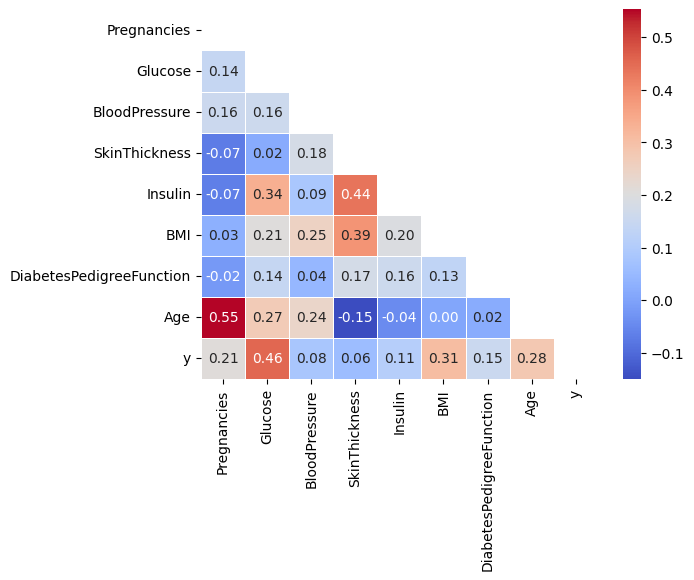

In [55]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

Vemos si podemos quitarnos alguna variable porque está muy correlacionada con otra/otras

In [56]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

Pregnancies                 3.744347
Glucose                     2.979271
BloodPressure               1.826300
SkinThickness               4.494820
Insulin                     3.861677
BMI                         2.571467
DiabetesPedigreeFunction    1.276148
Age                         5.079746
dtype: float64

se aprecia en la matriz de correlación y en el vif que no existen correlaciones exageradas. 

Vamos a dibujar los datos en función de la variable objetivo

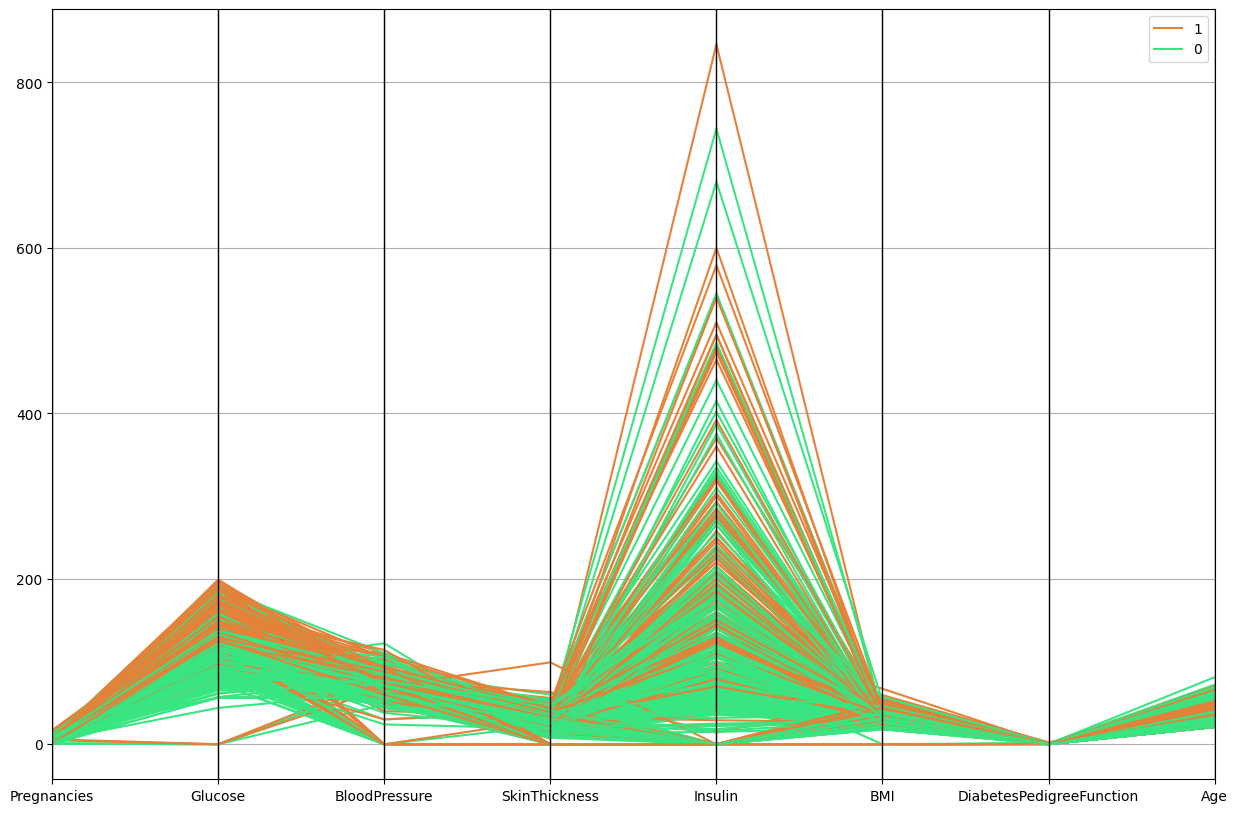

In [64]:
df = X
df["Outcome"] = y

plt.figure(figsize=(15,10))

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581"))

plt.show()


## Primer modelo. Lo hacemos "a pelo"

In [66]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

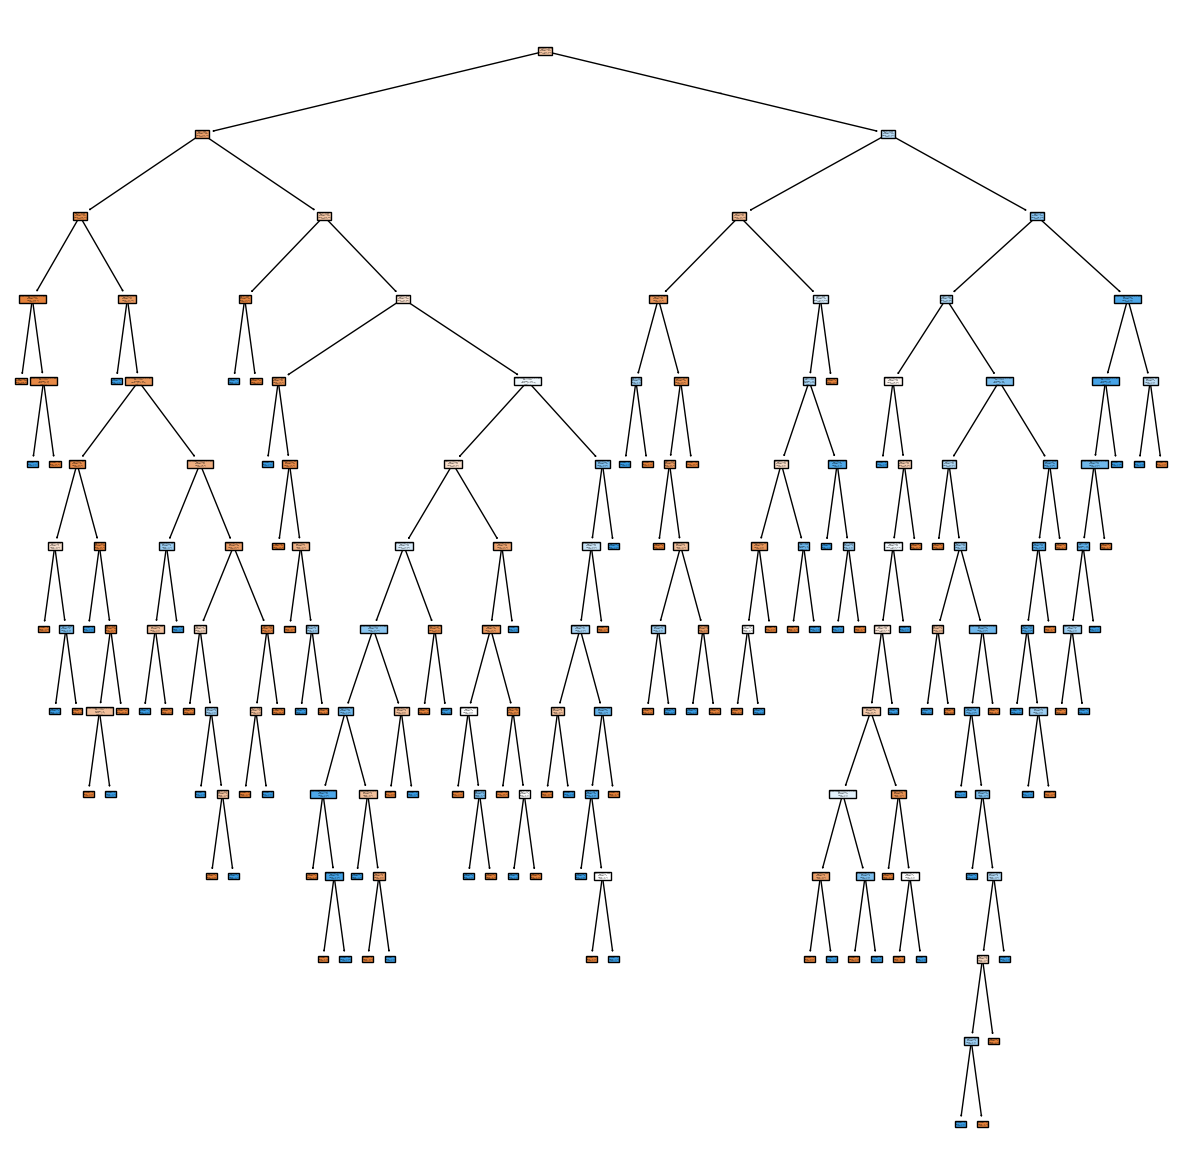

In [68]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [72]:
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [84]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [75]:


accuracy_score(y_test, y_pred_test)

0.7467532467532467

In [82]:
# vamos a comparar métricas con este árbol: 

def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [85]:
get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000,1.000000,1.000000
Test,0.746753,0.672269,0.742424,0.625,0.727273,0.757576
Diferencia,0.253247,0.327731,0.257576,0.375,0.272727,0.242424


Vemos que hay mucho sobreajuste y que hay mucha diferencia entre train y test. Vamo ahora a poner limitaciones al modelo para avitar esto. 

## Segunda iteración. Vamos a modificar a mano algunas propiedades del modelo

In [87]:
model2 = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=10, random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=4, min_samples_leaf=10,
                       random_state=42)

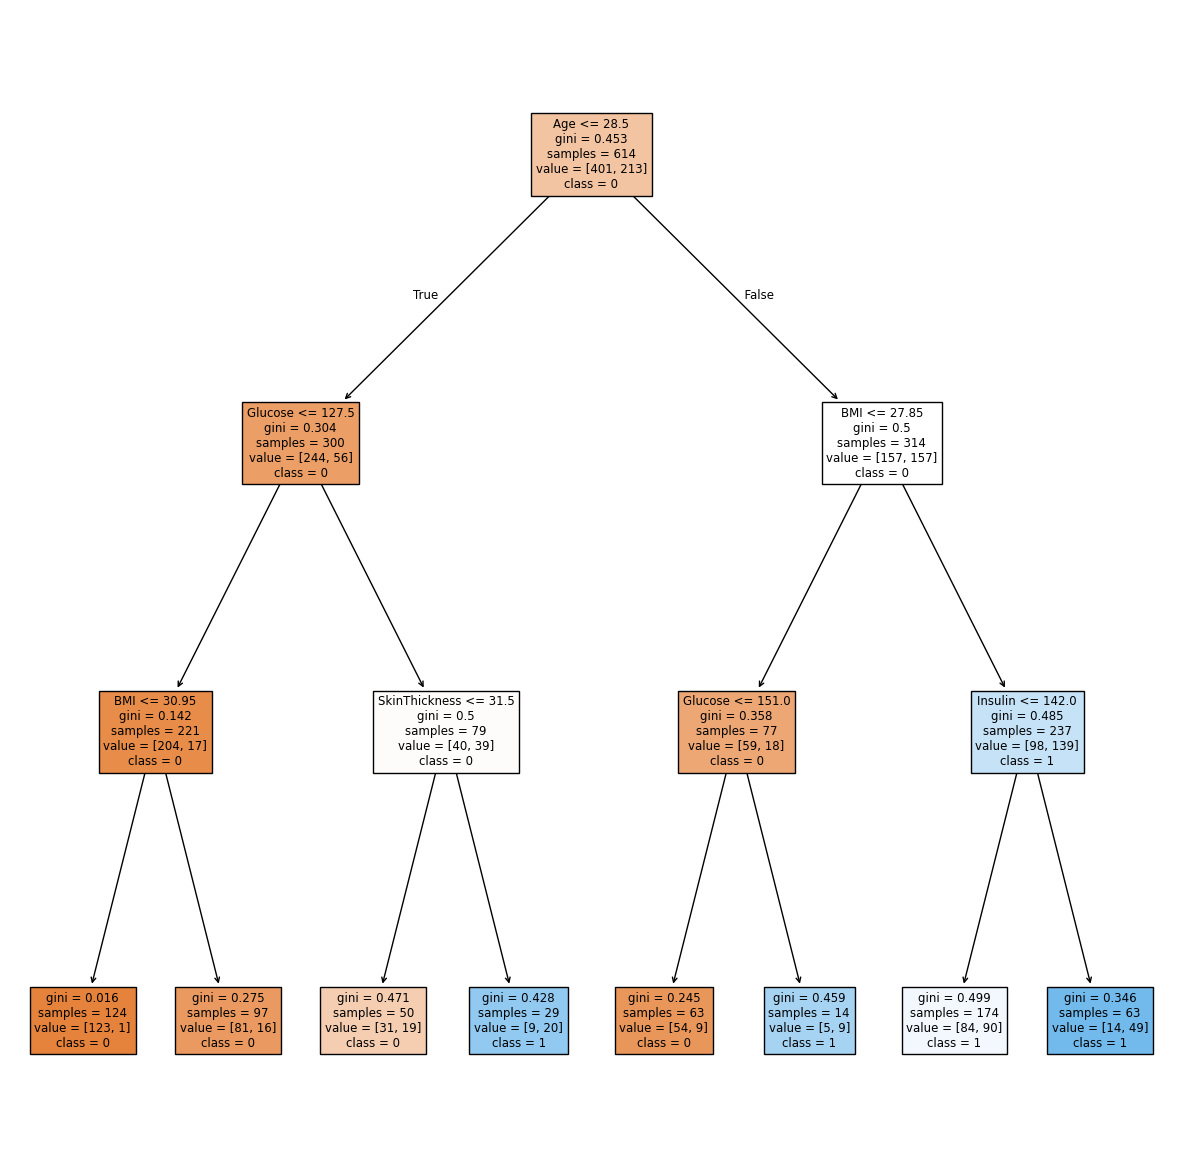

In [88]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model2, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [90]:
y_pred_test2 = model2.predict(X_test)
y_pred_train2 = model2.predict(X_train)

get_metrics(y_train, y_test, y_pred_train2, y_pred_test2)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.744300,0.681542,0.754715,0.6,0.788732,0.720698
Test,0.642857,0.604317,0.669697,0.5,0.763636,0.575758
Diferencia,0.101443,0.077225,0.085018,0.1,0.025096,0.144941


Vemos que ahora no hay sobreajuste pero la precisión es muy baja. 

## Tercera iteración: Seguimos con modificación manual de las propiedades

In [103]:
model3 = DecisionTreeClassifier(max_depth=4, max_features=X_train.shape[1]//2, min_samples_leaf=10, random_state=42)
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_leaf=10,
                       random_state=42)

In [104]:
y_pred_test3 = model3.predict(X_test)
y_pred_train3 = model3.predict(X_train)

get_metrics(y_train, y_test, y_pred_train3, y_pred_test3)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.78,0.58,0.70,0.85,0.44,0.96
Test,0.71,0.49,0.64,0.68,0.38,0.90
Diferencia,0.06,0.09,0.06,0.17,0.05,0.06


Mejoramos un poco pero sigue siendo un modelo flojo

## 4ª Iteración. Vamos a plicar un modelo de mejora del modelo. En este caso GridShearch CV

In [116]:

#definimos los hyperparámetros que van a estar en juego en las distintas pruebas

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model3, hyperparams, scoring = 'accuracy', cv = 20)
grid

GridSearchCV(cv=20,
             estimator=DecisionTreeClassifier(max_depth=4, max_features=4,
                                              min_samples_leaf=10,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [117]:
grid.fit(X_train, y_train)

GridSearchCV(cv=20,
             estimator=DecisionTreeClassifier(max_depth=4, max_features=4,
                                              min_samples_leaf=10,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [118]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

Vemos los mejores parámetros según el modelo de GridSearch

## con estos parámetros hacermos la útlima iteración

In [119]:
final_model = DecisionTreeClassifier(criterion='entropy', max_depth=5 , min_samples_leaf=1, min_samples_split=10)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [120]:
y_pred_test_final = final_model.predict(X_test)
y_pred_train_final = final_model.predict(X_train)

get_metrics(y_train, y_test,y_pred_train_final, y_pred_test_final)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.82,0.74,0.80,0.74,0.73,0.87
Test,0.79,0.70,0.76,0.70,0.69,0.84
Diferencia,0.03,0.04,0.03,0.04,0.04,0.03


Vemos que el modelo es algo mejor. 

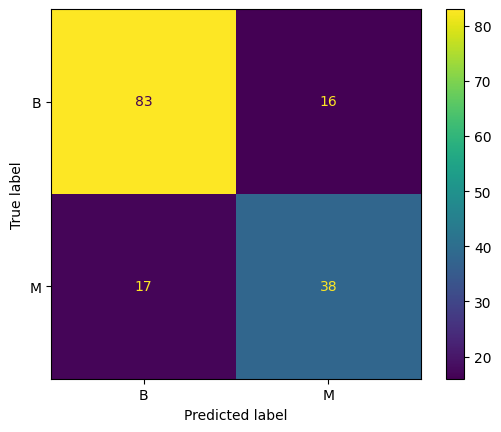

In [121]:
cm = confusion_matrix(y_test, y_pred_test_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B', 'M'])
disp.plot()

# Finalmente, guardamos el modelo final para poder usarlo en el futuro.

In [123]:
dump(final_model, open("/workspaces/machine-learning-arbol-decision-chema/models/tree_classifier_final.sav","wb"))